In [1]:
from bs4 import BeautifulSoup as bs

In [2]:
with open('example.html', encoding='latin-1') as f: 
    data = f.read() 

'<!DOCTYPE html>\n<html><head><script type="text/javascript" src="example_archivos/aceffb4631"></script><script type="text/javascript" src="example_archivos/300lo.js"></script><script type="text/javascript" src="example_archivos/_ate.js"></script><script src="example_archivos/nr-1118.js"></script><script type="text/javascript" async="" src="example_archivos/0526.js"></script><script type="text/javascript" async="" src="example_archivos/analytics.js"></script>\n\t<title>Digix DAO ICO - Check The DGD Token Price &amp; Performance | ICO Watch List</title>\n\t<meta name="description" content="All about the Digix DAO ICO and the DGD Token on the Ethereum blockchain. The ICO Watch List is the place for crypto and initial coin offering investors.">\n\t<!-- base href="https://icowatchlist.com/" -->\n\t<meta http-equiv="Content-Type" content="text/html; charset=windows-1252"><script async="" src="example_archivos/gtm.js"></script><script type="text/javascript">window.NREUM||(NREUM={}),__nr_requ
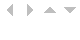

In [3]:
data 

In [4]:
data =  bs(data, 'html.parser')

In [5]:
data_body = data.body

In [6]:
data_body

<body>
<!-- Google Tag Manager (noscript) -->
<noscript><iframe height="0" src="https://www.googletagmanager.com/ns.html?id=GTM-5BB4JSK" style="display:none;visibility:hidden" width="0"></iframe></noscript>
<!-- End Google Tag Manager (noscript) -->
<div class="container">
<div class="row" style="position:fixed;top:0px;background-color:#fefefe;z-index:100000000;width:100%;max-width:1170px;border-bottom:1px gray solid;">
<a href="https://icowatchlist.com/"><img alt="ICO Watch List" src="example_archivos/logo3.png" style="width:120px;float:left;" title="ICO Watch List"/></a>
<div class="main-menu">
<div class="menu-icon"><img src="example_archivos/menu.png"/></div>
<!--<a href=''><div class='list-button' id='investors-list'>Investor's List</div></a>-->
<div class="menu-box">
<a href="https://icowatchlist.com/live"><p class="menu-link mobile-menu-link">Live ICO List</p></a>
<a href="https://icowatchlist.com/upcoming"><p class="menu-link mobile-menu-link">Upcoming ICO List</p></a>
<a href=

In [7]:
html = data_body.find_all("div", class_="col-xs-6 col-md-9")

In [8]:
icon = html[0]
icon

<div class="col-xs-6 col-md-9">
<a href="https://twitter.com/digixglobal" target="_blank"><img alt="Digix DAO On Twitter" class="social-icon" src="example_archivos/twitter-icon.png" title="Digix DAO On Twitter"/></a>
<a href="https://medium.com/@digix" target="_blank"><img alt="Digix DAO On Medium" class="social-icon" src="example_archivos/medium-icon.png" title="Digix DAO On Medium"/></a>
<a href="https://github.com/digixglobal" target="_blank"><img alt="Digix DAO On GitHub" class="social-icon" src="example_archivos/github-icon.png" title="Digix DAO On GitHub"/></a>
<a href="https://www.youtube.com/watch?v=mu2bOXt34K8" target="_blank"><img alt="Digix DAO On Youtube" class="social-icon" src="example_archivos/youtube-icon.png" title="Digix DAO On Youtube"/></a>
<a href="https://www.linkedin.com/company/digixglobal" target="_blank"><img alt="Digix DAO On LinkedIn" class="social-icon" src="example_archivos/linkedin-icon.png" title="Digix DAO On LinkedIn"/></a>
<a href="http://reddit.com/r

In [9]:
icon = icon.contents
icon

['\n',
 <a href="https://twitter.com/digixglobal" target="_blank"><img alt="Digix DAO On Twitter" class="social-icon" src="example_archivos/twitter-icon.png" title="Digix DAO On Twitter"/></a>,
 '\n',
 <a href="https://medium.com/@digix" target="_blank"><img alt="Digix DAO On Medium" class="social-icon" src="example_archivos/medium-icon.png" title="Digix DAO On Medium"/></a>,
 '\n',
 <a href="https://github.com/digixglobal" target="_blank"><img alt="Digix DAO On GitHub" class="social-icon" src="example_archivos/github-icon.png" title="Digix DAO On GitHub"/></a>,
 '\n',
 <a href="https://www.youtube.com/watch?v=mu2bOXt34K8" target="_blank"><img alt="Digix DAO On Youtube" class="social-icon" src="example_archivos/youtube-icon.png" title="Digix DAO On Youtube"/></a>,
 '\n',
 <a href="https://www.linkedin.com/company/digixglobal" target="_blank"><img alt="Digix DAO On LinkedIn" class="social-icon" src="example_archivos/linkedin-icon.png" title="Digix DAO On LinkedIn"/></a>,
 '\n',
 <a href

In [10]:
link = [item for item in icon if not item == '\n']

In [11]:
link = []

In [12]:
for item in icon:
    if not item == '\n':
        link.append(item)


In [15]:
hello = link[0]

In [16]:
hello

<a href="https://twitter.com/digixglobal" target="_blank"><img alt="Digix DAO On Twitter" class="social-icon" src="example_archivos/twitter-icon.png" title="Digix DAO On Twitter"/></a>

In [17]:
hello.get('href')

'https://twitter.com/digixglobal'

In [19]:
linktxt=[]
for xx in link:
    bb = xx.get('href')
    linktxt.append(bb)
linktxt

['https://twitter.com/digixglobal',
 'https://medium.com/@digix',
 'https://github.com/digixglobal',
 'https://www.youtube.com/watch?v=mu2bOXt34K8',
 'https://www.linkedin.com/company/digixglobal',
 'http://reddit.com/r/digix']

In [68]:
for xx in linktxt:
    if 'github' in xx:
        print('Yes')

Yes


In [69]:
web =  data_body.find_all("div", class_="col-xs-6 col-md-6")[1].contents


In [61]:
data_body

<body>
<!-- Google Tag Manager (noscript) -->
<noscript><iframe height="0" src="https://www.googletagmanager.com/ns.html?id=GTM-5BB4JSK" style="display:none;visibility:hidden" width="0"></iframe></noscript>
<!-- End Google Tag Manager (noscript) -->
<div class="container">
<div class="row" style="position:fixed;top:0px;background-color:#fefefe;z-index:100000000;width:100%;max-width:1170px;border-bottom:1px gray solid;">
<a href="https://icowatchlist.com/"><img alt="ICO Watch List" src="example_archivos/logo3.png" style="width:120px;float:left;" title="ICO Watch List"/></a>
<div class="main-menu">
<div class="menu-icon"><img src="example_archivos/menu.png"/></div>
<!--<a href=''><div class='list-button' id='investors-list'>Investor's List</div></a>-->
<div class="menu-box">
<a href="https://icowatchlist.com/live"><p class="menu-link mobile-menu-link">Live ICO List</p></a>
<a href="https://icowatchlist.com/upcoming"><p class="menu-link mobile-menu-link">Upcoming ICO List</p></a>
<a href=

In [70]:
web

['\n',
 <a class="btn btn-default btn-lg btn-block btnSuccess oblink" data-page="homepage" data-slug="digixdao" href="https://www.dgx.io/dgd/" rel="nofollow" target="_blank">Official Site</a>,
 '\n']

In [51]:
website=[ii for ii in web if not ii == '\n']

In [52]:
website

[<a class="btn btn-default btn-lg btn-block btnSuccess oblink" data-page="homepage" data-slug="digixdao" href="https://www.dgx.io/dgd/" rel="nofollow" target="_blank">Official Site</a>]

In [53]:
websitelink = []
for tag in website:
    tagg = tag.get('href')
    websitelink.append(tagg)

In [54]:
websitelink


['https://www.dgx.io/dgd/']

In [62]:
def get_github_link(html):
    html1 = bs(html, 'html.parser')
    html_body = html1.body
    html2 = html_body.find_all("div", class_="col-xs-6 col-md-9")
    icon = html2[0]
    icon1 = icon.contents
    link = [item for item in icon1 if not item == '\n']
    linktxt=[]
    for xx in link:
        bb = xx.get('href')
        linktxt.append(bb)
    linktxt
    for xx in linktxt:
    if 'github' in xx:
        print('Yes')
    else:
        print('No')
    
    


In [59]:
def get_webpage_link(html):
    html1 = bs(html, 'html.parser')
    html_body = html1.body
    html2 = html_body.find_all("div", class_="col-xs-6 col-md-6")[1].contents
    website=[ii for ii in web if not ii == '\n']
    websitelink = []
    for tag in website:
        tagg = tag.get('href')
    websitelink.append(tagg)

In [63]:
get_github_link(data_body)

<body>
<!-- Google Tag Manager (noscript) -->
<noscript><iframe height="0" src="https://www.googletagmanager.com/ns.html?id=GTM-5BB4JSK" style="display:none;visibility:hidden" width="0"></iframe></noscript>
<!-- End Google Tag Manager (noscript) -->
<div class="container">
<div class="row" style="position:fixed;top:0px;background-color:#fefefe;z-index:100000000;width:100%;max-width:1170px;border-bottom:1px gray solid;">
<a href="https://icowatchlist.com/"><img alt="ICO Watch List" src="example_archivos/logo3.png" style="width:120px;float:left;" title="ICO Watch List"/></a>
<div class="main-menu">
<div class="menu-icon"><img src="example_archivos/menu.png"/></div>
<!--<a href=''><div class='list-button' id='investors-list'>Investor's List</div></a>-->
<div class="menu-box">
<a href="https://icowatchlist.com/live"><p class="menu-link mobile-menu-link">Live ICO List</p></a>
<a href="https://icowatchlist.com/upcoming"><p class="menu-link mobile-menu-link">Upcoming ICO List</p></a>
<a href=

In [57]:
a[0]

IndexError: list index out of range